1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

3. Data Checks to perform
    
    3.1.Check Missing values

    3.2 Check Duplicates
    
    3.3 Check data type
    
    3.4 Check the number of unique values of each column
    
    3.5 Check statistics of data set
    
    3.6 Check various categories present in the different categorical column

In [4]:
##Checking for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no Missing values in the dataset

In [5]:
##Checking for duplicate values
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [6]:
##Checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The Dataset has 1000 rows with no null rows and 5 columns have object datatype and 3 columns have integer datatype.

In [7]:
##Checking for unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05

All standard deviations are also close - between 14.6 and 15.19

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [9]:
print("Categories in gender variable: ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable: ",end=" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course variable: ",end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [10]:
##defining numerical and categorical features
numeric_features= [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#printing the features categorically
print("We have {} numerical features which are: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features which are: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features which are: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features which are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


4. Adding total marks and average marks column

In [11]:
df['total_marks'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_marks'] = df['total_marks']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score']==100]['average_marks'].count()
maths_full = df[df['math_score']==100]['average_marks'].count()
writing_full = df[df['writing_score']==100]['average_marks'].count()

print("Number of students who got full marks in reading: {}".format(reading_full))
print("Number of students who got full marks in maths: {}".format(maths_full))
print("Number of students who got full marks in writing: {}".format(writing_full))

Number of students who got full marks in reading: 17
Number of students who got full marks in maths: 7
Number of students who got full marks in writing: 14


In [13]:
reading_full = df[df['reading_score']<40]['average_marks'].count()
maths_full = df[df['math_score']<40]['average_marks'].count()
writing_full = df[df['writing_score']<40]['average_marks'].count()

print("Number of students who failed in reading: {}".format(reading_full))
print("Number of students who failed marks in maths: {}".format(maths_full))
print("Number of students who failed marks in writing: {}".format(writing_full))

Number of students who failed in reading: 26
Number of students who failed marks in maths: 40
Number of students who failed marks in writing: 32


In [14]:
reading_full = df[df['reading_score']>=40]['average_marks'].count()
maths_full = df[df['math_score']>=40]['average_marks'].count()
writing_full = df[df['writing_score']>=40]['average_marks'].count()

print("Number of students who passed in reading: {}".format(reading_full))
print("Number of students who passed marks in maths: {}".format(maths_full))
print("Number of students who passed marks in writing: {}".format(writing_full))

Number of students who passed in reading: 974
Number of students who passed marks in maths: 960
Number of students who passed marks in writing: 968


Insights Obtained

    Students are worst performing in maths

    Students are best in reading

5. Exploring Data (Visualization)

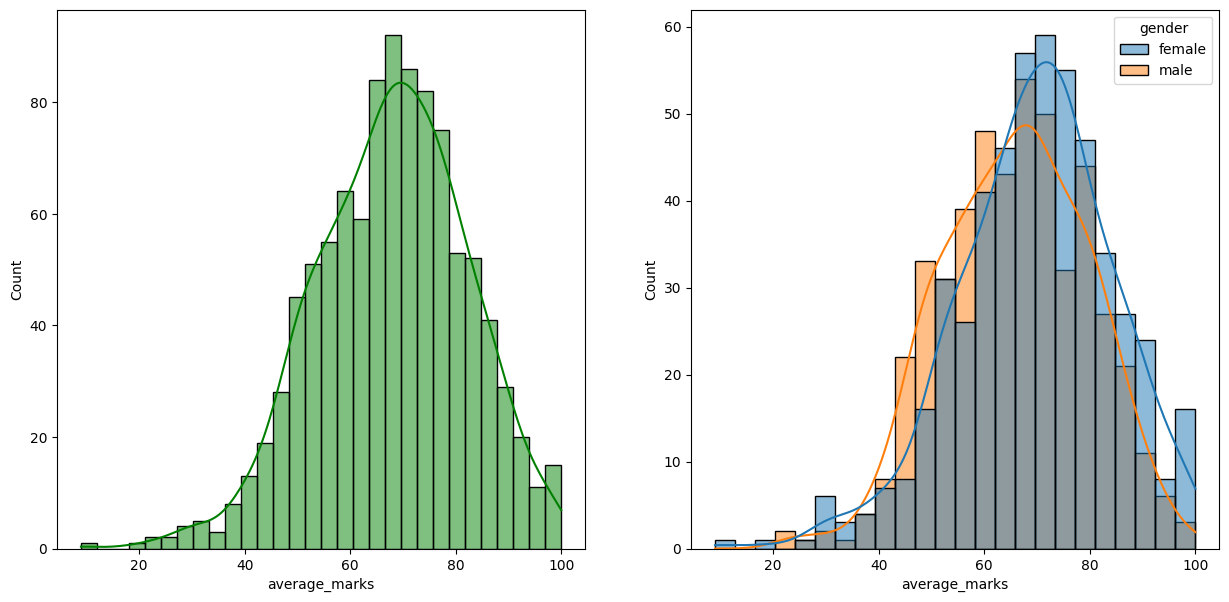

In [15]:
## Visualize average score distribution to make some conclusion
## Histogram and KDE

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sn.histplot(data=df,x='average_marks',bins=30,kde=True,color='g')
plt.subplot(122)
sn.histplot(data=df,x='average_marks',kde=True,hue='gender')
plt.show()

Insight observed: 
    Female students perform better than male

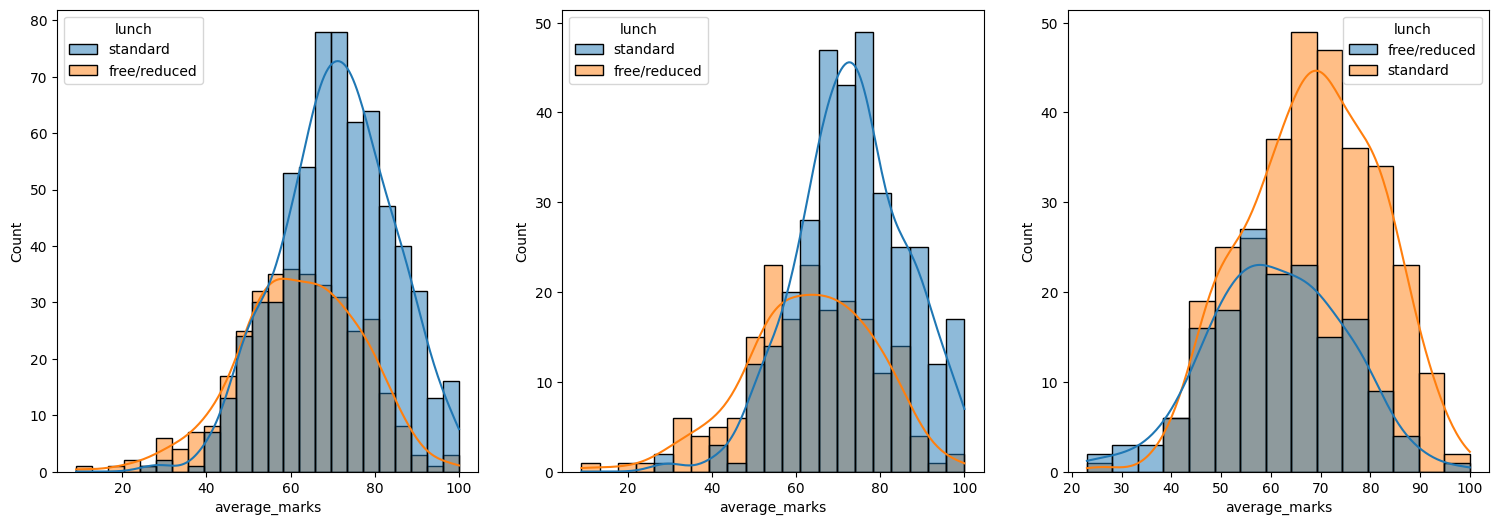

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sn.histplot(data=df,x='average_marks',kde=True,hue='lunch')
plt.subplot(142)
sn.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.subplot(143)
sn.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.show()

Insights:

    Students with free/reduced lunch perform less than standard students

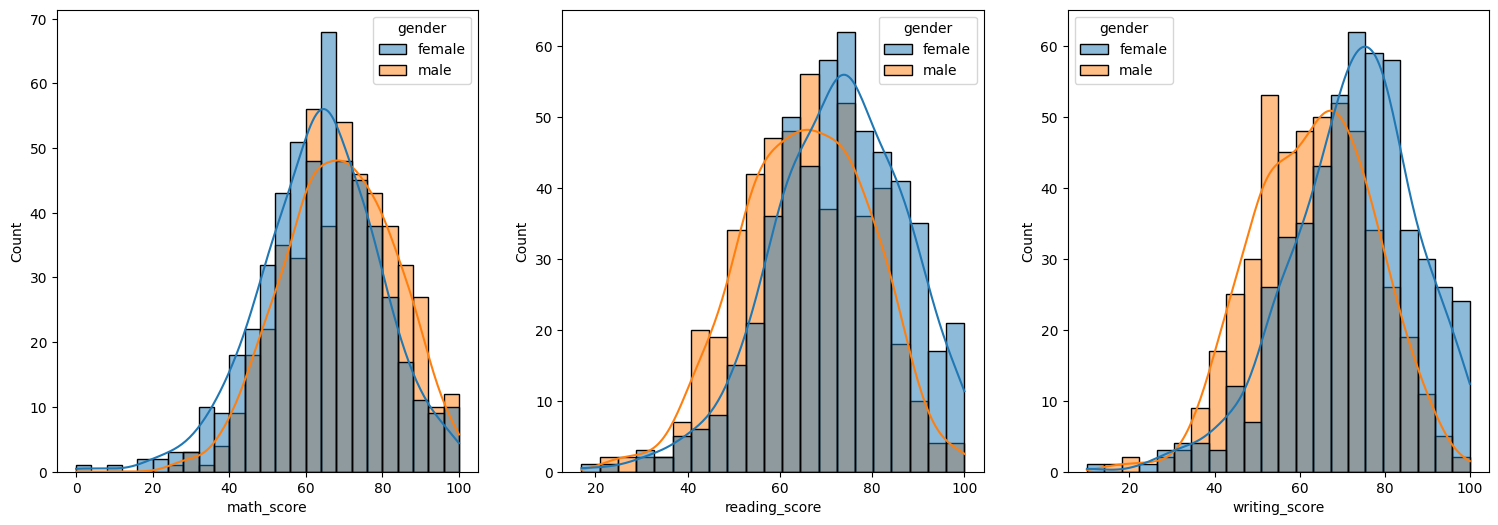

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sn.histplot(data=df,x='math_score',kde=True,hue='gender')
plt.subplot(142)
sn.histplot(data=df,x='reading_score',kde=True,hue='gender')
plt.subplot(143)
sn.histplot(data=df,x='writing_score',kde=True,hue='gender')
plt.show()

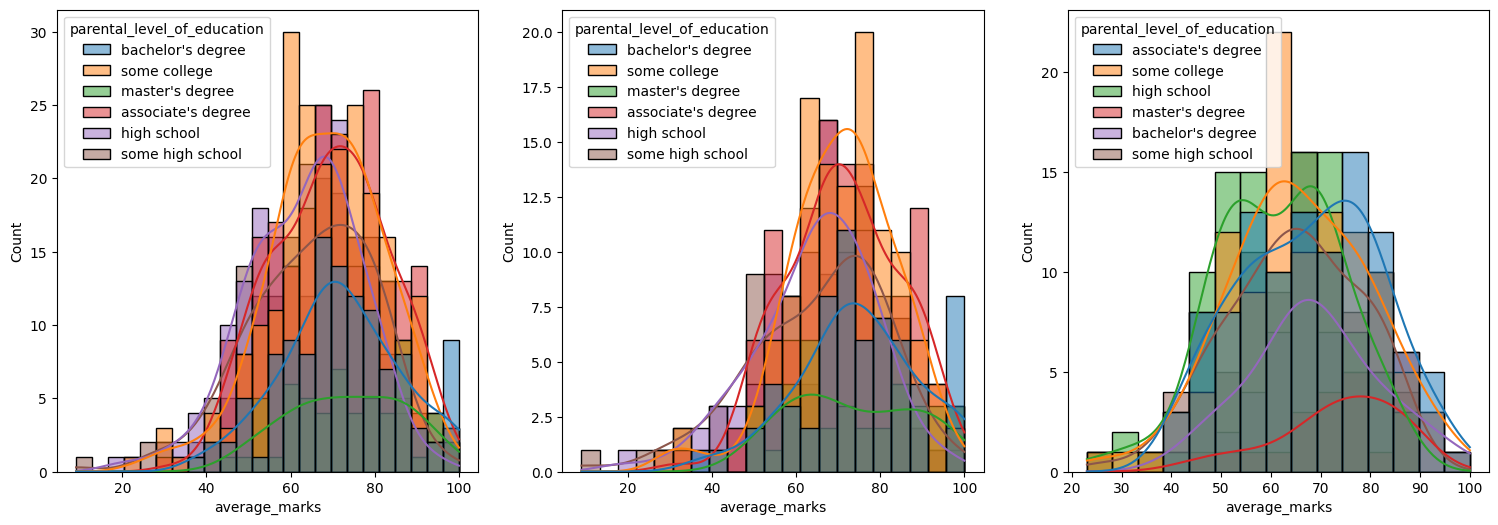

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sn.histplot(data=df,x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sn.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sn.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.show()

Insights:

    1. In general parents education doesn't play a significant role in childs marks.

    2. Parents of female students with doesn't play a critical role in their marks.

    3. Parents of male students with masters degree or associate degree tend to perform well.

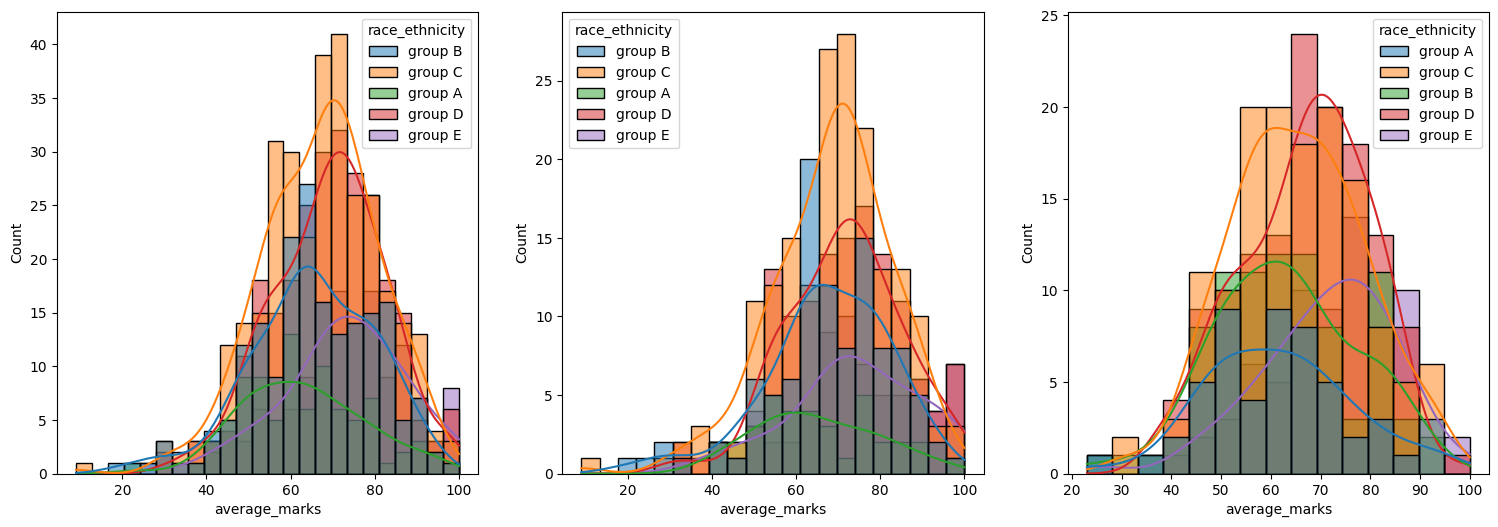

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sn.histplot(data=df,x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(142)
sn.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(143)
sn.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='race_ethnicity')
plt.show()

Insights:

    1. Group E and Group C students perform well in exams.

    2. Group A and Group B students perform poor in exams.

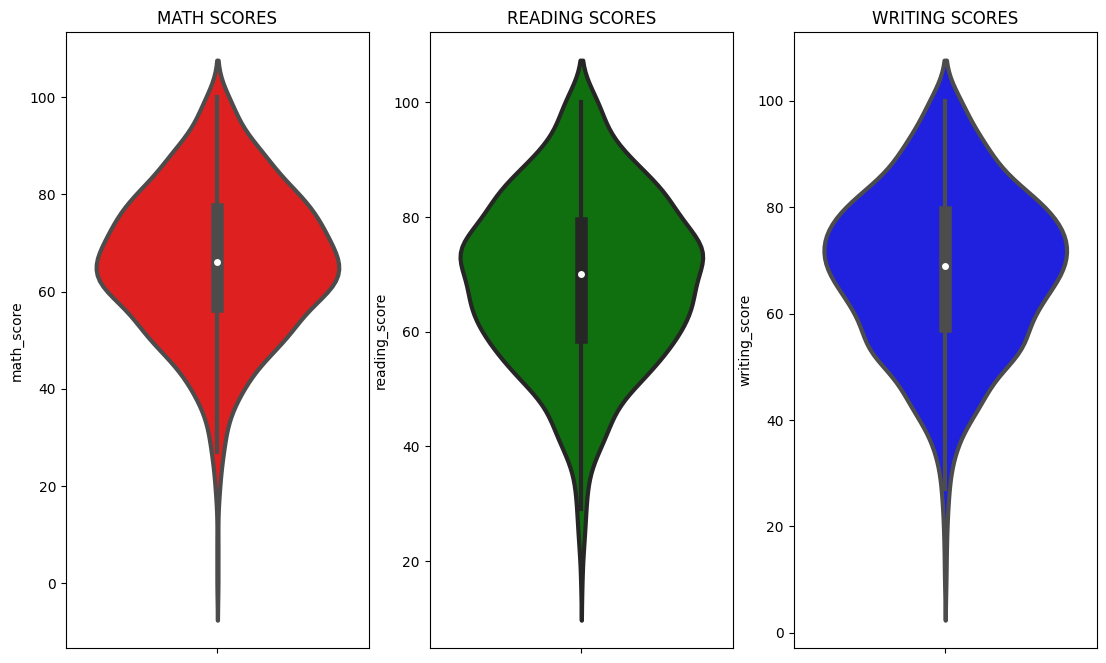

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sn.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sn.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sn.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights:

    From the above three violinplots we can see that most score between 60-80 in Maths. Whereas in reading and writing most of the students 60-80.

Multivariate analysis using pieplot

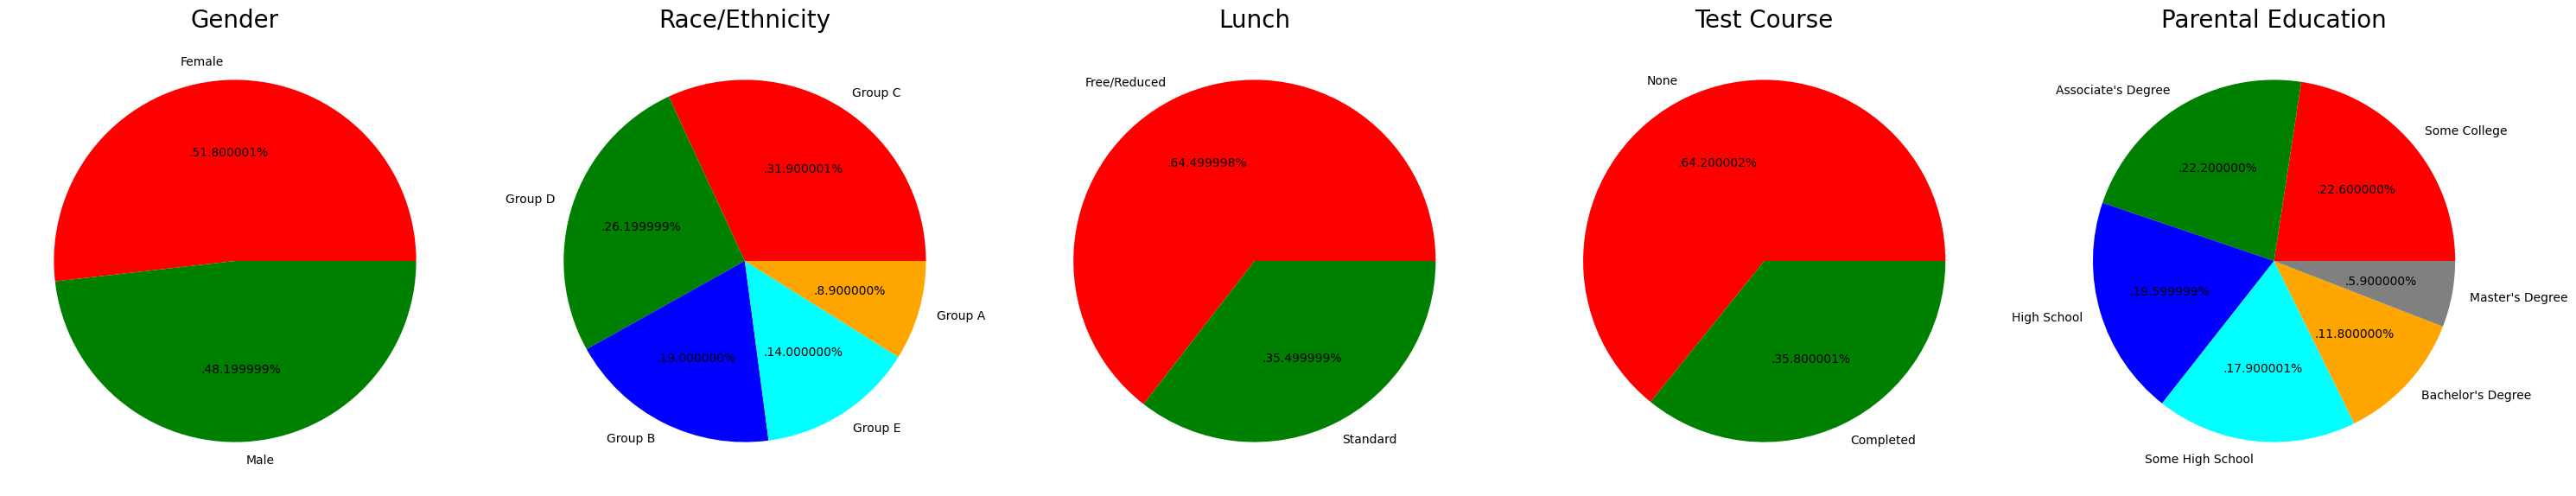

In [25]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Free/Reduced','Standard'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights:

    Number of Male and female students is almost equal

    Number of students is most in race Group C

    Number of students with standard lunch is more

    Number of students with no enrollment in test preparation course is more.

    Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"    

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

How is distribution of Gender ?
Is gender has any impact on student's performance 

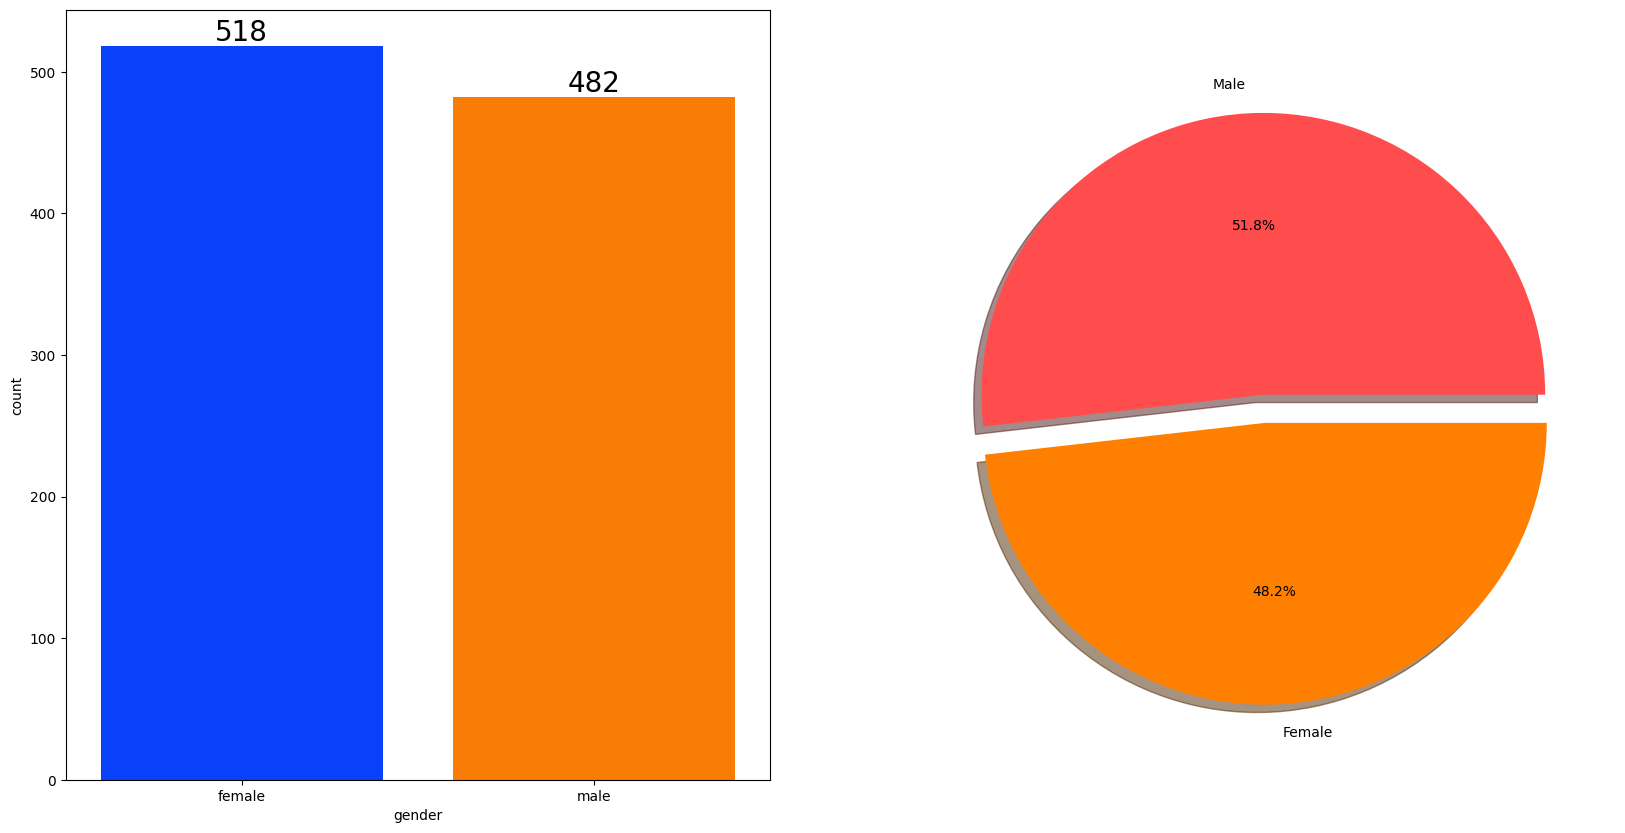

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sn.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights

    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

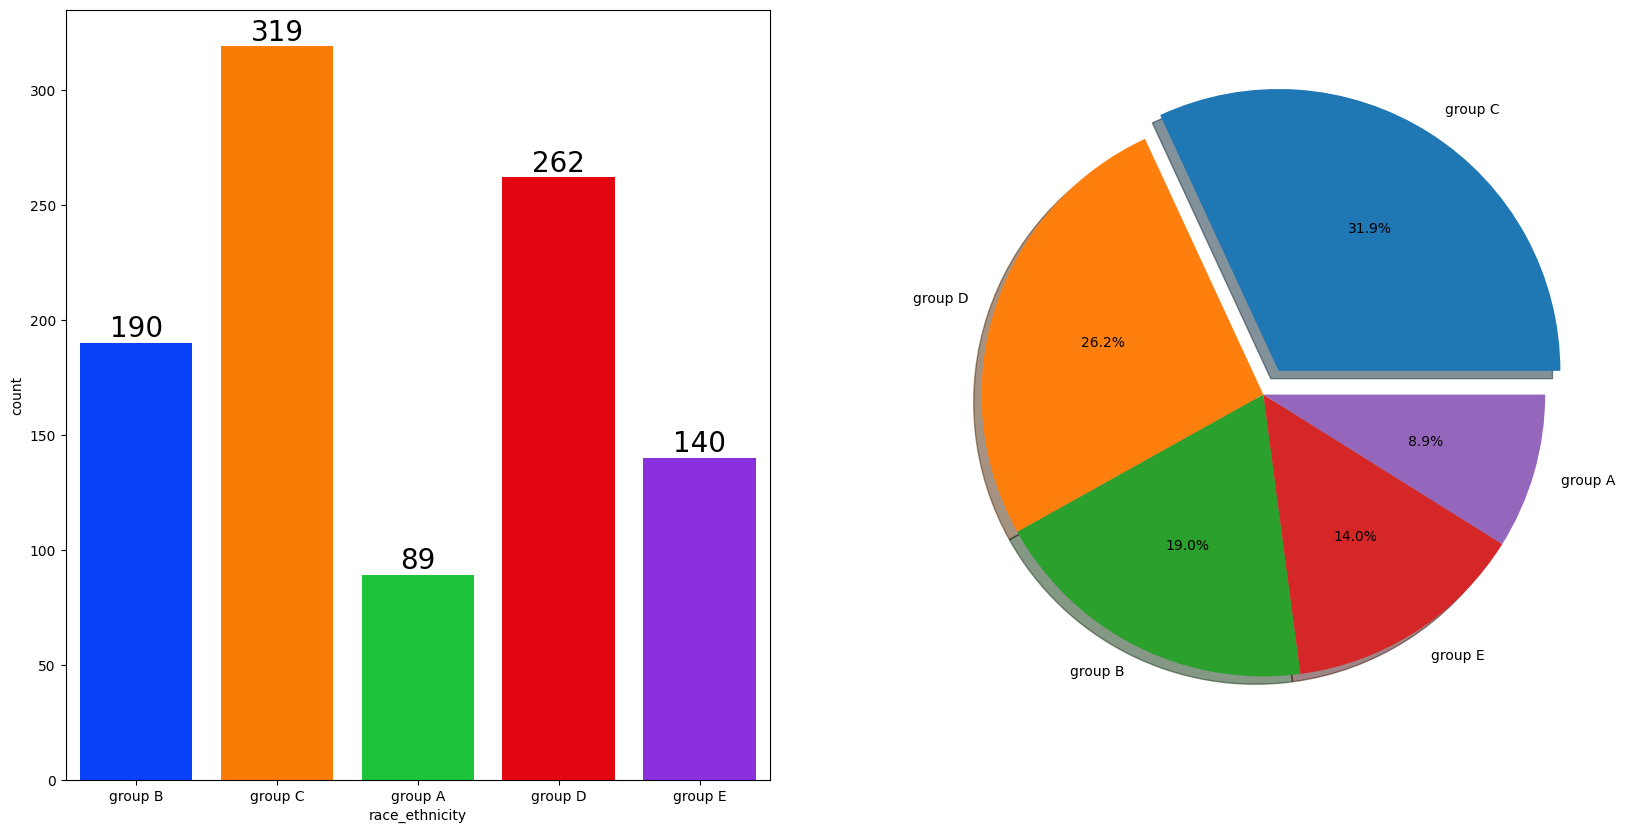

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sn.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

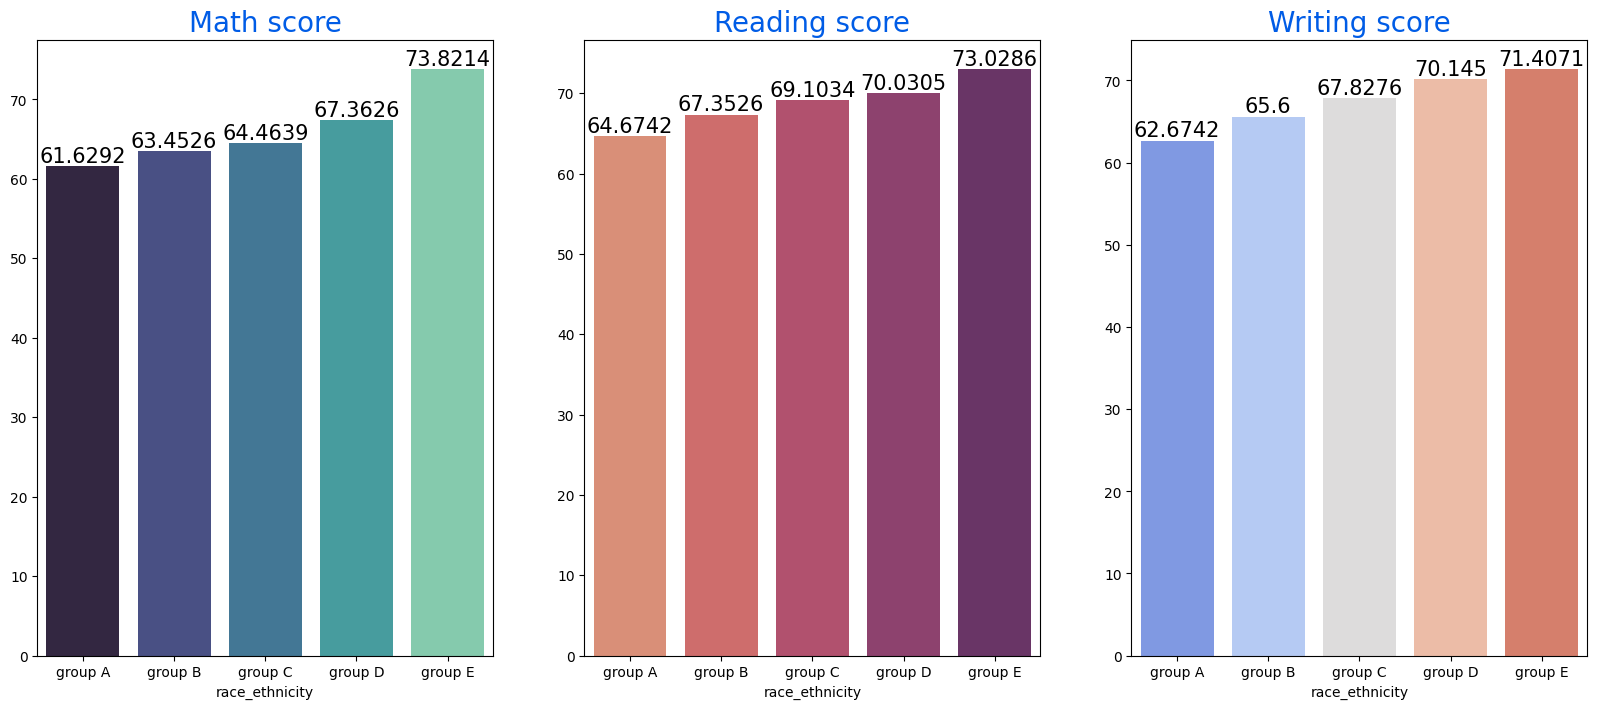

In [33]:
##BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sn.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sn.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sn.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

    Group E students have scored the highest marks.

    Group A students have scored the lowest marks.
    
    Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sn.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

4.4.5 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

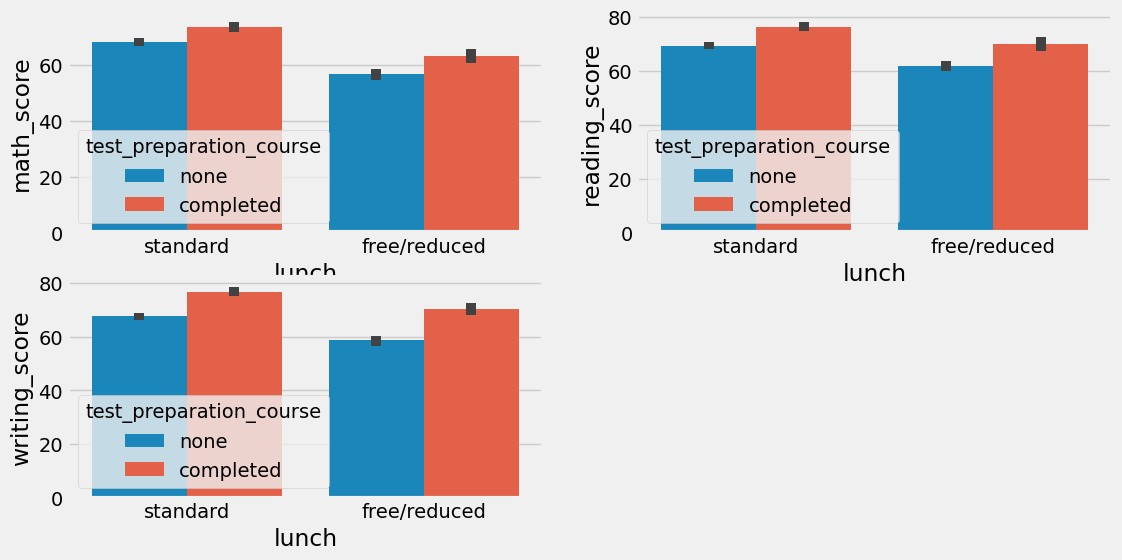

In [38]:

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sn.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sn.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sn.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights

    Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING OUTLIERS


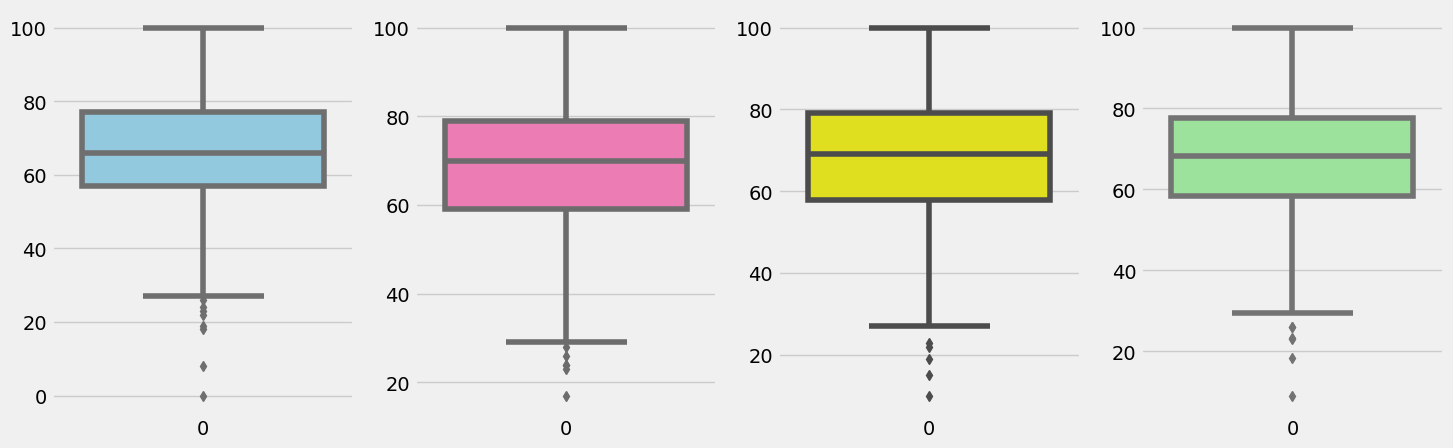

In [40]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sn.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sn.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sn.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sn.boxplot(df['average_marks'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

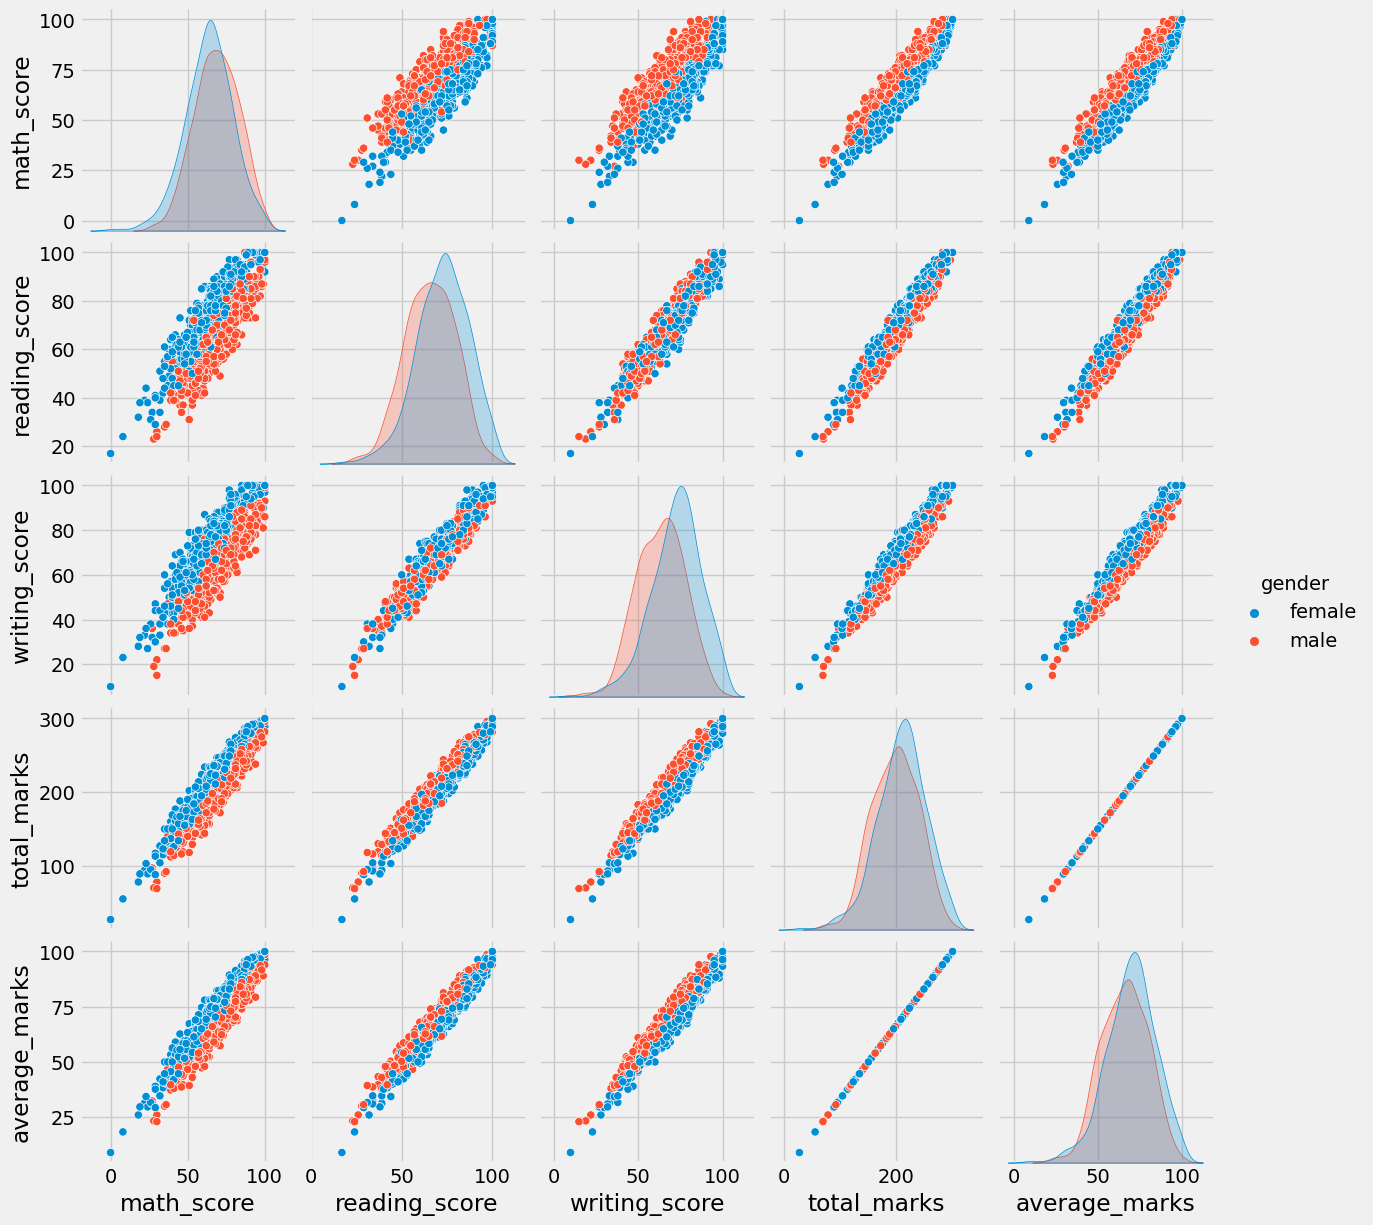

In [41]:
sn.pairplot(df,hue = 'gender')
plt.show()